In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MaxNLocator


rawData = pd.read_excel("rawData.xlsx")
print(rawData.columns)


rawData = rawData[[
                    "DisNo.",
                    "Historic",
                    "Classification Key",
                    "Disaster Group",
                    "Disaster Subgroup",
                    "Disaster Type",
                    "Disaster Subtype",
                    "ISO",
                    "Country",
                    "Subregion",
                    "Region",
                    "Location",
                    "AID Contribution ('000 US$)",
                    "Magnitude",
                    "Magnitude Scale",
                    "Latitude",
                    "Longitude",
                    "Start Year",
                    "Start Month",
                    "Start Day",
                    "End Year",
                    "End Month",
                    "End Day",
                    "Total Deaths",
                    "No. Injured",
                    "No. Affected",
                    "No. Homeless",
                    "Total Affected",
                    "Total Damage ('000 US$)",
                    "Total Damage, Adjusted ('000 US$)",
                    "CPI"                    
                    ]]

rawData.columns = [
                    "DisNo",
                    "Historic",
                    "Classification_Key",
                    "Disaster_Group",
                    "Disaster_Subgroup",
                    "Disaster_Type",
                    "Disaster_Subtype",
                    "ISO",
                    "Country",
                    "Subregion",
                    "Region",
                    "Location",
                    "AID_Contribution",
                    "Magnitude",
                    "Magnitude_Scale",
                    "Latitude",
                    "Longitude",
                    "Start_Year",
                    "Start_Month",
                    "Start_Day",
                    "End_Year",
                    "End_Month",
                    "End_Day",
                    "Total_Deaths",
                    "No_Injured",
                    "No_Affected",
                    "No_Homeless",
                    "Total_Affected",
                    "Total_Damage",
                    "Total_Damage_Adjusted",
                    "CPI"                    
                    ]

rawData["Start_Day"] = rawData["Start_Month"].fillna(1)
rawData["Start_Month"] = rawData["Start_Month"].fillna(1)

rawData["Start_Day"] = rawData["Start_Day"].astype(int).astype(str)
rawData["Start_Month"] = rawData["Start_Month"].astype(int).astype(str)
rawData["Start_Year"] = rawData["Start_Year"].astype(int).astype(str)


rawData["End_Day"] = rawData.apply(lambda row: 1 if np.isnan(row["End_Day"]) else row["End_Day"],axis = 1)
rawData["End_Month"] = rawData.apply(lambda row: 12 if np.isnan(row["End_Month"]) else row["End_Month"],axis = 1)
rawData["End_Day"] = rawData["End_Day"].astype(int).astype(str)
rawData["End_Month"] = rawData["End_Month"].astype(int).astype(str)
rawData["End_Year"] = rawData["End_Year"].astype(int).astype(str)
 
rawData["Start_Date"] = rawData.apply(lambda row: pd.to_datetime(f"{row['Start_Day'] + '/' + row['Start_Month'] + '/' + row['Start_Year']}", format="%d/%m/%Y"), axis = 1)
rawData["End_Date"] = rawData.apply(lambda row: pd.to_datetime(f"{row['End_Day'] + '/' + row['End_Month'] + '/' + row['End_Year']}", format="%d/%m/%Y"), axis = 1)

rawData["Start_Day"] = rawData["Start_Day"].astype(int)
rawData["Start_Month"] = rawData["Start_Month"].astype(int)
rawData["Start_Year"] = rawData["Start_Year"].astype(int)

# EDA

for elm in ["Disaster_Group", "Disaster_Subgroup", "Disaster_Type", "Disaster_Subtype"]:
    print(f"{elm}:", rawData[elm].unique(), end = "\n\n")

rawData = rawData.loc[rawData["Disaster_Group"] == "Natural"] # We only take 'Natural' disasters.
disCount = rawData.shape[0]
print("Number of natural disasters", disCount)

for elm in ["Disaster_Group", "Disaster_Subgroup", "Disaster_Type", "Disaster_Subtype"]:
    print(f"{elm}:", rawData[elm].unique(), end = "\n\n")


print("Number of countries in the dataset:", rawData['Country'].unique().shape[0], end = "\n\n")

print("Number of sub-regions in the dataset:", rawData['Subregion'].unique().shape[0])
print("Subregions:",  rawData['Subregion'].unique(), end = "\n\n")

print("Number of regions in the dataset:", rawData['Region'].unique().shape[0])
print("Subregions:",  rawData['Region'].unique(), end = "\n\n")


print("Date Range:", rawData["Start_Date"].min(), rawData["Start_Date"].max())

print("Percentage of None in Total_Damage", round(sum(rawData["Total_Damage"].isna()) / disCount, 2))
print("Percentage of None in Total_Affected", round(sum(rawData["Total_Affected"].isna()) / disCount, 2))
print("Percentage of None in Total_Deaths", round(sum(rawData["Total_Deaths"].isna()) / disCount, 2))

rawData["Decade"] = rawData['Start_Year'].astype(int)//10*10  

filteredData = rawData.copy()
filteredData = filteredData.loc[~(filteredData["Total_Damage"].isna()) | (~filteredData["Total_Deaths"].isna())]
filteredData = filteredData.loc[filteredData["Disaster_Subgroup"] != "Extra-terrestrial"]


disasterMap = {}

for disasterGroup in filteredData["Disaster_Group"].unique():
    if disasterGroup not in disasterMap:
        disasterMap[disasterGroup] = {}
    for disasterSubgroup in filteredData[filteredData["Disaster_Group"] == disasterGroup]["Disaster_Subgroup"].unique():
        if disasterSubgroup not in disasterMap[disasterGroup]:
            disasterMap[disasterGroup][disasterSubgroup] = {}
        for disasterType in filteredData[(filteredData["Disaster_Group"] == disasterGroup) & (filteredData["Disaster_Subgroup"] == disasterSubgroup)]["Disaster_Type"].unique(): 
            if disasterType not in disasterMap[disasterGroup][disasterSubgroup]:
                disasterMap[disasterGroup][disasterSubgroup][disasterType] = []           
            for disasterSubType in filteredData[(filteredData["Disaster_Group"] == disasterGroup) & (filteredData["Disaster_Subgroup"] == disasterSubgroup) & (filteredData["Disaster_Type"] == disasterType)]["Disaster_Subtype"].unique(): 
                disasterMap[disasterGroup][disasterSubgroup][disasterType].append(disasterSubType)

# Using this map we can see unique disaster groups and types such that
print(disasterMap["Natural"]["Geophysical"]["Earthquake"])


decadeDeaths_ByDisaster_Group = filteredData.groupby(["Disaster_Group","Decade"])["Total_Deaths"].sum().reset_index()
decadeDeaths_ByDisaster_SubGroup = filteredData.groupby(["Disaster_Subgroup","Decade"])["Total_Deaths"].sum().reset_index()
decadeDeaths_ByDisaster_Type = filteredData.groupby(["Disaster_Type","Decade"])["Total_Deaths"].sum().reset_index()


yearlyDeaths_ByDisaster_Group = filteredData.groupby(["Disaster_Group","Start_Year"])["Total_Deaths"].sum().reset_index()
yearlyDeaths_ByDisaster_SubGroup = filteredData.groupby(["Disaster_Subgroup","Start_Year"])["Total_Deaths"].sum().reset_index()
yearlyDeaths_ByDisaster_Type = filteredData.groupby(["Disaster_Type","Start_Year"])["Total_Deaths"].sum().reset_index()
yearlyDeaths_ByDisaster_Type_Regional = filteredData.groupby(["Disaster_Type","Region","Decade"])["Total_Deaths"].sum().reset_index()


yearlyEvents = rawData.groupby(["Start_Year"])["DisNo"].count()
yearlyEvents_ByDisaster_Type = rawData.groupby(["Disaster_Type","Start_Year"])["DisNo"].count()
decadelEvents_ByDisaster_Type = rawData.groupby(["Disaster_Type","Decade"])["DisNo"].count()


def ytick_formatter(x, pos):
    if x >= 1e6:
        return f'{x / 1e6:.1f}M'
    elif x>= 1e3:
        return f'{x / 1e3:.0f}K'
    else:
        return f'{x:.0f}'
    

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')
Disaster_Group: ['Natural' 'Technological']

Disaster_Subgroup: ['Meteorological' 'Ind

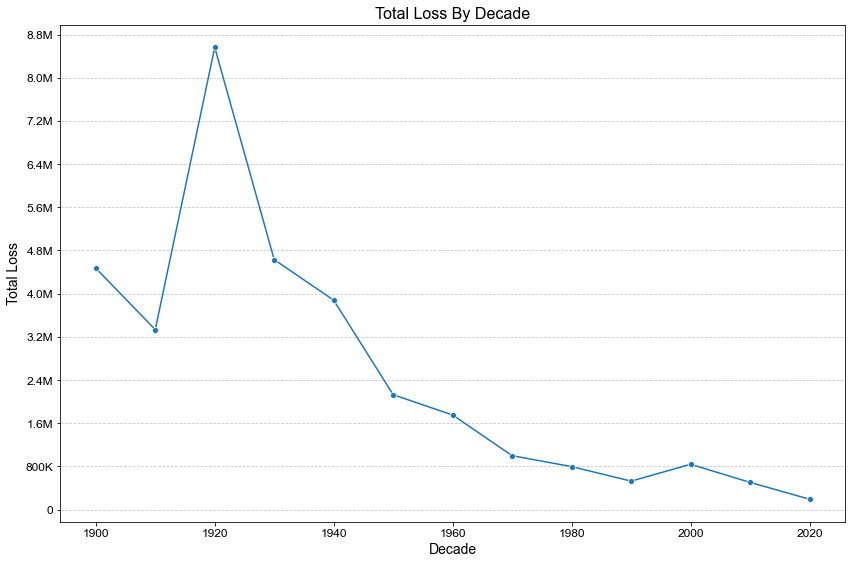

In [2]:

f, ax = plt.subplots(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")
sns.lineplot(x='Decade', y='Total_Deaths', data=decadeDeaths_ByDisaster_Group, marker='o')

plt.title('Total Loss By Decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Total Loss', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(FuncFormatter(ytick_formatter))
ax.yaxis.set_major_locator(MaxNLocator(nbins=12)) 
plt.tight_layout()

plt.savefig('./plots/decadeDeaths_ByDisaster_Group.png', dpi=300)
plt.show()

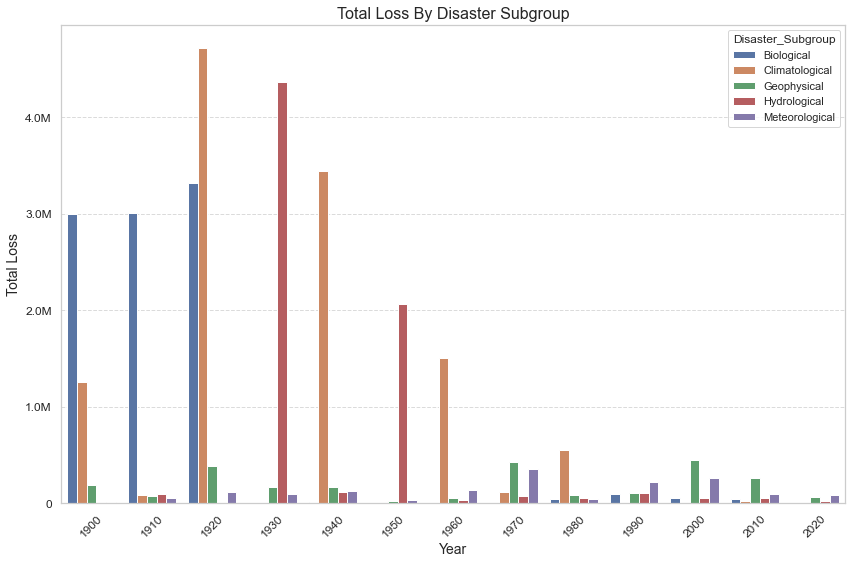

In [3]:


# decadeDeaths_ByDisaster_SubGroup
f, ax = plt.subplots(figsize=(12, 8))

sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Decade', y='Total_Deaths', hue="Disaster_Subgroup", data=decadeDeaths_ByDisaster_SubGroup)

plt.title('Total Loss By Disaster Subgroup', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Loss', fontsize=14)
plt.xticks(fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplots_adjust(left=0.1, right=0.9)
ax.yaxis.set_major_formatter(FuncFormatter(ytick_formatter))
plt.tight_layout()

plt.savefig('./plots/decadeDeaths_ByDisaster_SubGroup.png', dpi=300)
plt.show()



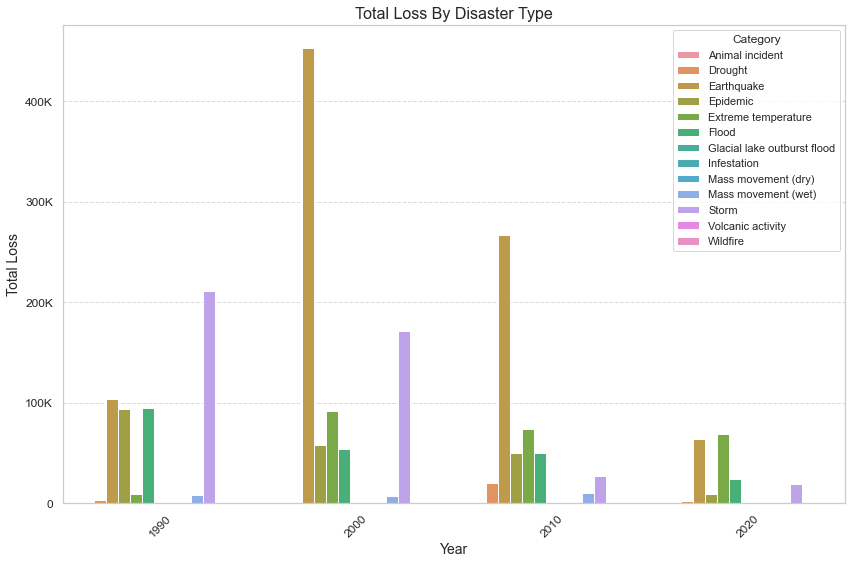

In [4]:


# decadeDeaths_ByDisaster_Type
f, ax = plt.subplots(figsize=(12, 8))

sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Decade', y='Total_Deaths', hue="Disaster_Type", data=decadeDeaths_ByDisaster_Type.loc[decadeDeaths_ByDisaster_Type.Decade > 1980])

plt.title('Total Loss By Disaster Type', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Loss', fontsize=14)
plt.xticks(fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplots_adjust(left=0.1, right=0.9)
ax.yaxis.set_major_formatter(FuncFormatter(ytick_formatter))
plt.tight_layout()
plt.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper right')
plt.savefig('./plots/decadeDeaths_ByDisaster_Type.png', dpi=300)
plt.show()


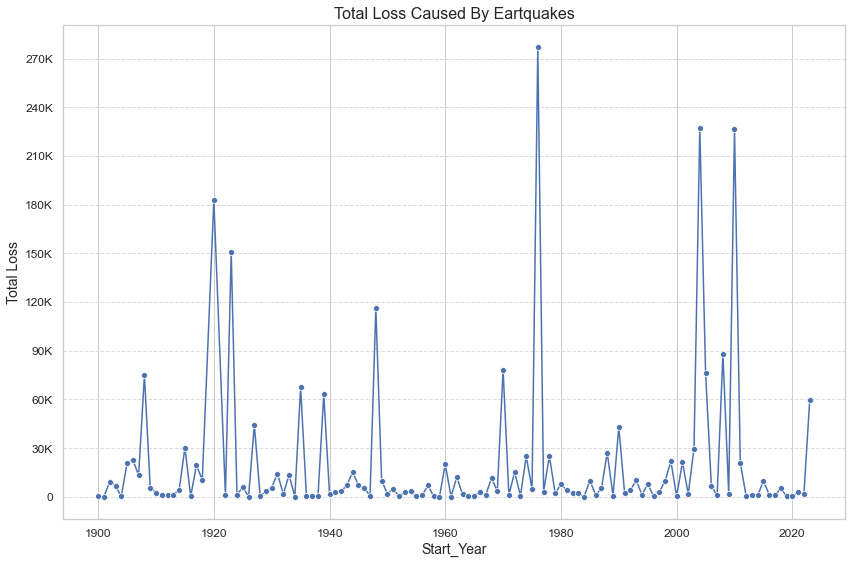

In [5]:


# yearlyDeaths_ByDisaster_Type_Eathquake
f, ax = plt.subplots(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")
sns.lineplot(x='Start_Year', y='Total_Deaths', data=yearlyDeaths_ByDisaster_Type.loc[yearlyDeaths_ByDisaster_Type.Disaster_Type == "Earthquake"], marker='o')


plt.title('Total Loss Caused By Eartquakes', fontsize=16)
plt.xlabel('Start_Year', fontsize=14)
plt.ylabel('Total Loss', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(FuncFormatter(ytick_formatter))
ax.yaxis.set_major_locator(MaxNLocator(nbins=12)) 
plt.tight_layout()

plt.savefig('./plots/yearlyDeaths_ByDisaster_Type_Eathquake.png', dpi=300)
plt.show()



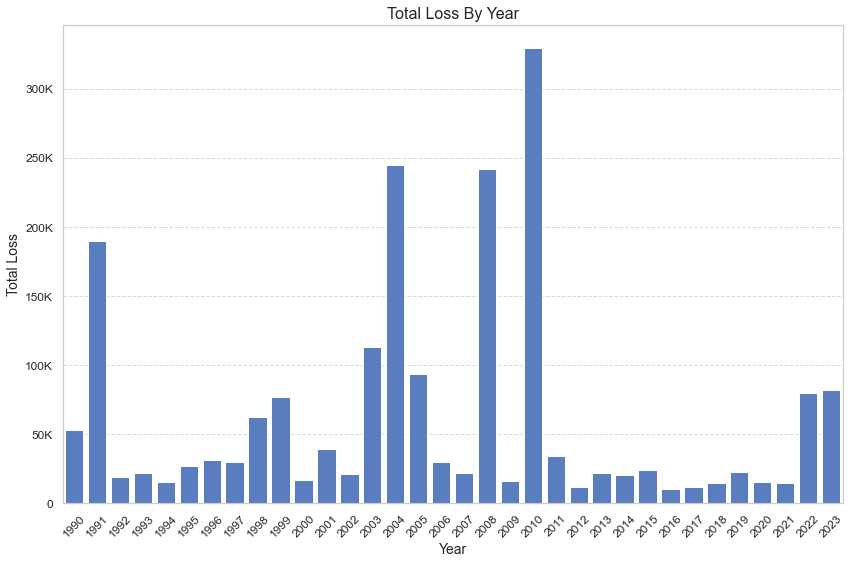

In [9]:
# yearlyDeaths_ByDisaster_Group

f, ax = plt.subplots(figsize=(12, 8))

sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")

sns.barplot(x='Start_Year', y='Total_Deaths', data=yearlyDeaths_ByDisaster_Group.loc[yearlyDeaths_ByDisaster_Group.Start_Year >= 1990], color="b")

plt.title('Total Loss By Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Loss', fontsize=14)
plt.xticks(fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplots_adjust(left=0.1, right=0.9)
ax.yaxis.set_major_formatter(FuncFormatter(ytick_formatter))
plt.tight_layout()

plt.savefig('./plots/yearlyDeaths_ByDisaster_Group.png', dpi=300)
plt.show()



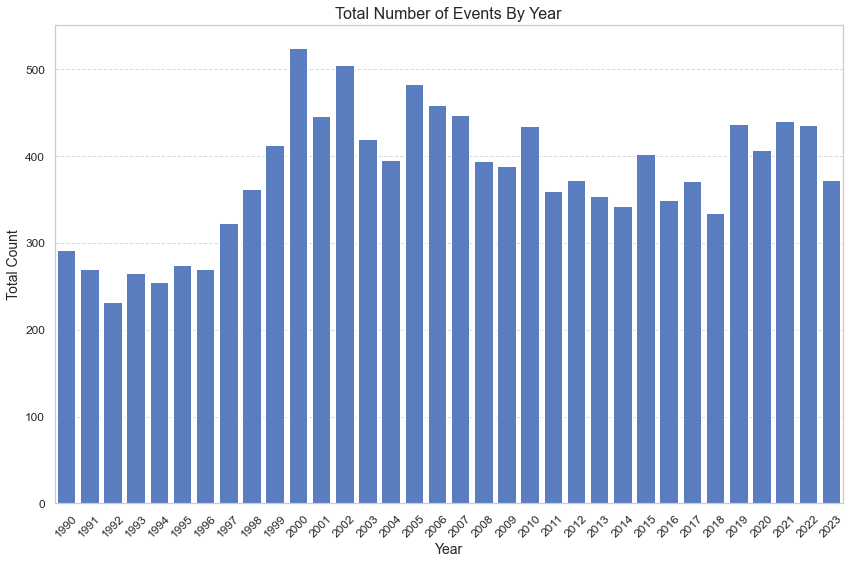

In [14]:
f, ax = plt.subplots(figsize=(12, 8))
yearlyEvents = yearlyEvents.reset_index()
sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")

sns.barplot(x='Start_Year', y='DisNo', data=yearlyEvents.loc[yearlyEvents.Start_Year >= 1990], color="b")

plt.title('Total Number of Events By Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.xticks(fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplots_adjust(left=0.1, right=0.9)
ax.yaxis.set_major_formatter(FuncFormatter(ytick_formatter))
plt.tight_layout()

plt.savefig('./plots/yearlyEvents.png', dpi=300)
plt.show()


In [16]:
yearlyEvents_ByDisaster_Type = yearlyEvents_ByDisaster_Type.reset_index()

,Disaster_Type,Start_Year,DisNo
0,Animal incident,2014,1
1,Drought,1900,2
2,Drought,1903,1
3,Drought,1906,1
4,Drought,1910,9
...,...,...,...
848,Wildfire,2019,14
849,Wildfire,2020,9
850,Wildfire,2021,19
851,Wildfire,2022,15


In [27]:
decadelEvents_ByDisaster_Type = decadelEvents_ByDisaster_Type.reset_index()

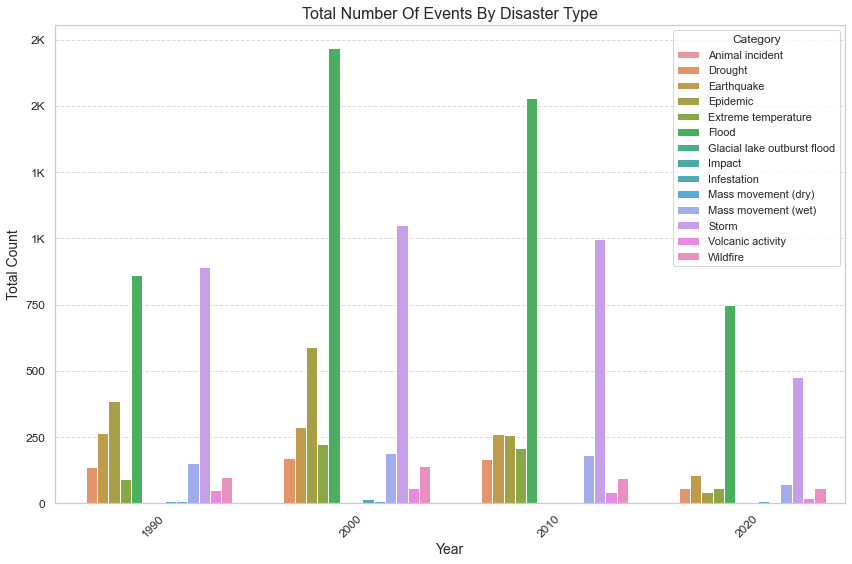

In [29]:
f, ax = plt.subplots(figsize=(12, 8))


sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Decade', y='DisNo', hue="Disaster_Type", data=decadelEvents_ByDisaster_Type.loc[decadelEvents_ByDisaster_Type.Decade > 1980])

plt.title('Total Number Of Events By Disaster Type', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.xticks(fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplots_adjust(left=0.1, right=0.9)
ax.yaxis.set_major_formatter(FuncFormatter(ytick_formatter))
plt.tight_layout()
plt.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper right')
plt.savefig('./plots/yearlyEvents_ByDisaster_Type.png', dpi=300)
plt.show()


In [31]:
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [32]:
ex.pie(filteredData,names='Region',title='Propotion Of Region',hole=0.33)

In [34]:
ex.pie(filteredData,names='Disaster_Subgroup',title='Propotion Of Disaster_Subgroup',hole=0.33)

In [35]:
ex.pie(filteredData,names='Disaster_Type',title='Propotion Of Disaster_Type',hole=0.33)

In [37]:
filteredData.columns

Index(['DisNo', 'Historic', 'Classification_Key', 'Disaster_Group',
       'Disaster_Subgroup', 'Disaster_Type', 'Disaster_Subtype', 'ISO',
       'Country', 'Subregion', 'Region', 'Location', 'AID_Contribution',
       'Magnitude', 'Magnitude_Scale', 'Latitude', 'Longitude', 'Start_Year',
       'Start_Month', 'Start_Day', 'End_Year', 'End_Month', 'End_Day',
       'Total_Deaths', 'No_Injured', 'No_Affected', 'No_Homeless',
       'Total_Affected', 'Total_Damage', 'Total_Damage_Adjusted', 'CPI',
       'Start_Date', 'End_Date', 'Decade'],
      dtype='object')

In [50]:
fig = make_subplots(rows=3, cols=1)

tr1=go.Box(x=filteredData.loc[filteredData.Total_Affected < 500e3]['Total_Deaths'],name='Total_Deaths Box Plot',boxmean=True)
tr2=go.Histogram(x=filteredData.loc[filteredData.Total_Affected < 500e3]['Total_Deaths'],name='Total_Deaths Histogram <500k')
tr3=go.Histogram(x=filteredData.loc[filteredData.Total_Affected < 5e3]['Total_Deaths'],name='Total_Deaths Histogram <5k')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)
fig.add_trace(tr3,row=3,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of Total_Deaths")
fig.show()


In [59]:
fig = make_subplots(rows=3, cols=1)

tr1=go.Box(x=filteredData.loc[filteredData.Total_Damage_Adjusted < 50e6]['Total_Damage_Adjusted'],name='Total_Damage_Adjusted Box Plot',boxmean=True)
tr2=go.Histogram(x=filteredData.loc[filteredData.Total_Damage_Adjusted < 50e6]['Total_Damage_Adjusted'],name='Total_Damage_Adjusted Histogram <500k', nbinsx = 5)
tr3=go.Histogram(x=filteredData.loc[filteredData.Total_Damage_Adjusted < 10e5]['Total_Damage_Adjusted'],name='Total_Damage_Adjusted Histogram <5k', nbinsx = 5)

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)
fig.add_trace(tr3,row=3,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of Total_Damage_Adjusted")
fig.show()

In [61]:
filteredData.head()

,DisNo,Historic,Classification_Key,Disaster_Group,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,ISO,Country,Subregion,...,No_Injured,No_Affected,No_Homeless,Total_Affected,Total_Damage,Total_Damage_Adjusted,CPI,Start_Date,End_Date,Decade
0,1900-0003-USA,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,...,NaN,NaN,NaN,NaN,30000.0,1055280.0,2.842847,1900-09-09,1900-09-08,1900
2,1900-0006-JAM,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,...,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,1900-01-01,1900-01-06,1900
3,1900-0007-JAM,Yes,nat-bio-epi-vir,Natural,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,...,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,1900-01-01,1900-01-13,1900
4,1900-0008-JPN,Yes,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,...,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,1900-07-07,1900-07-07,1900
5,1900-0009-TUR,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,...,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,1900-07-07,1900-07-12,1900


In [67]:
yearlyRegionalEvents_ByDisasterGroup = filteredData.groupby(["Disaster_Group","ISO","Country"])["DisNo"].count().reset_index()

In [68]:
yearlyRegionalEvents_ByDisasterGroup

,Disaster_Group,ISO,Country,DisNo
0,Natural,AFG,Afghanistan,191
1,Natural,AGO,Angola,57
2,Natural,AIA,Anguilla,3
3,Natural,ALB,Albania,29
4,Natural,ANT,Netherlands Antilles,2
...,...,...,...,...
219,Natural,YMN,Yemen Arab Republic,6
220,Natural,YUG,Yugoslavia,17
221,Natural,ZAF,South Africa,107
222,Natural,ZMB,Zambia,30


In [69]:
import plotly.express as px
fig = px.choropleth(yearlyRegionalEvents_ByDisasterGroup, locations="ISO",
                    color="DisNo", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [130]:
yearlyRegionalDeaths_ByDisasterGroup = filteredData.groupby(["Start_Year","Disaster_Group","ISO","Country"])["Total_Deaths"].sum().reset_index()
decadelRegionalEvents_ByDisasterGroup = filteredData.groupby(["Decade","Disaster_Group","ISO","Country"])["DisNo"].count().reset_index()
regionalDeaths_ByDisasterGroup =  filteredData.groupby(["Disaster_Group","ISO","Country"])["Total_Deaths"].sum().reset_index()

In [127]:
yearlyRegionalDeaths_ByDisasterGroup

,Start_Year,Disaster_Group,ISO,Country,Total_Deaths
0,1900,Natural,CPV,Cabo Verde,11000.0
1,1900,Natural,IND,India,1250000.0
2,1900,Natural,JAM,Jamaica,330.0
3,1900,Natural,JPN,Japan,30.0
4,1900,Natural,TUR,Türkiye,140.0
...,...,...,...,...,...
5217,2023,Natural,VNM,Viet Nam,10.0
5218,2023,Natural,YEM,Yemen,291.0
5219,2023,Natural,ZAF,South Africa,71.0
5220,2023,Natural,ZMB,Zambia,2.0


In [92]:
import plotly.express as px
fig = px.choropleth(regionalDeaths_ByDisasterGroup, locations="ISO",
                    color="Total_Deaths", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [131]:
decadelRegionalDeaths_ByDisasterGroup

,Start_Year,Disaster_Group,ISO,Country,Total_Deaths
0,1900,Natural,CPV,Cabo Verde,11000.0
1,1900,Natural,IND,India,1250000.0
2,1900,Natural,JAM,Jamaica,330.0
3,1900,Natural,JPN,Japan,30.0
4,1900,Natural,TUR,Türkiye,140.0
...,...,...,...,...,...
5217,2023,Natural,VNM,Viet Nam,10.0
5218,2023,Natural,YEM,Yemen,291.0
5219,2023,Natural,ZAF,South Africa,71.0
5220,2023,Natural,ZMB,Zambia,2.0


In [124]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly
# min year in your dataset
year = 1900

scl = [[0.0, '#ffffff'],[0.2, '#b4a8ce'],[0.4, '#8573a9'],
       [0.6, '#7159a3'],[0.8, '#5732a1'],[1.0, '#2c0579']] # purples

data_slider = []
for year in yearlyRegionalDeaths_ByDisasterGroup['Start_Year'].unique():
    df_segmented =  yearlyRegionalDeaths_ByDisasterGroup[(yearlyRegionalDeaths_ByDisasterGroup['Start_Year']== year)]

    for col in df_segmented.columns:
        df_segmented[col] = df_segmented[col].astype(str)

    data_each_yr = dict(
                        type='choropleth',
                        locations = df_segmented['ISO'],
                        z=df_segmented['Total_Deaths'].astype(float),
                        colorscale = scl,
                        colorbar= {'title':'# Total Deaths'})

    data_slider.append(data_each_yr)

steps = []
for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 1900))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title ='Yearly Deaths', geo=dict(scope='world',
                       projection={'type': 'winkel tripel'}),
              sliders=sliders)

fig = dict(data=data_slider, layout=layout)
plotly.offline.iplot(fig)

In [133]:
scl = [[0.0, '#ffffff'],[0.2, '#b4a8ce'],[0.4, '#8573a9'],
       [0.6, '#7159a3'],[0.8, '#5732a1'],[1.0, '#2c0579']] # purples

data_slider = []
for year in decadelRegionalEvents_ByDisasterGroup['Decade'].unique():
    df_segmented =  decadelRegionalEvents_ByDisasterGroup[(decadelRegionalEvents_ByDisasterGroup['Decade']== year)]

    for col in df_segmented.columns:
        df_segmented[col] = df_segmented[col].astype(str)

    data_each_yr = dict(
                        type='choropleth',
                        locations = df_segmented['ISO'],
                        z=df_segmented['DisNo'].astype(float),
                        colorscale = scl,
                        colorbar= {'title':'# Total Events'})

    data_slider.append(data_each_yr)

steps = []
for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i * 10 + 1900))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title ='Yearly Events', geo=dict(scope='world',
                       projection={'type': 'winkel tripel'}),
              sliders=sliders)

fig = dict(data=data_slider, layout=layout)
plotly.offline.iplot(fig)